In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/others/ML AI/train.csv')

In [ ]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,150728,2074419,37,1,single,rented,no,Analyst,Kozhikode,Kerala,1,11,0
1,148628,3728026,48,17,single,rented,yes,Official,Nanded,Maharashtra,11,12,0
2,25237,7159687,38,5,single,rented,no,Computer_operator,Jalgaon,Maharashtra,3,11,0
3,110209,277326,45,9,single,rented,no,Economist,Medininagar,Jharkhand,9,13,0
4,187462,8822191,26,13,single,rented,no,Aviator,Gorakhpur,Uttar_Pradesh,3,10,1


In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/others/ML AI/test.csv')

In [ ]:
df.info()
#checking null values
pd.isna(df).sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   50000 non-null  int64 
 1   income               50000 non-null  int64 
 2   age                  50000 non-null  int64 
 3   experience           50000 non-null  int64 
 4   married              50000 non-null  object
 5   house_ownership      50000 non-null  object
 6   car_ownership        50000 non-null  object
 7   profession           50000 non-null  object
 8   city                 50000 non-null  object
 9   state                50000 non-null  object
 10  current_job_years    50000 non-null  int64 
 11  current_house_years  50000 non-null  int64 
 12  risk_flag            50000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 5.0+ MB


0

No null values in the data

In [ ]:
df.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,126057.075940,4.991806e+06,49.980180,10.042140,6.305360,12.001020,0.122840
std,72714.218241,2.881463e+06,17.066644,5.997867,3.644017,1.399321,0.328257
min,2.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63457.500000,2.493344e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126332.000000,4.991059e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,188832.250000,7.475587e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,251980.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
train_data=df.drop(['Id','risk_flag'], axis=1)
label=df.risk_flag

0    0.87716
1    0.12284
Name: risk_flag, dtype: float64


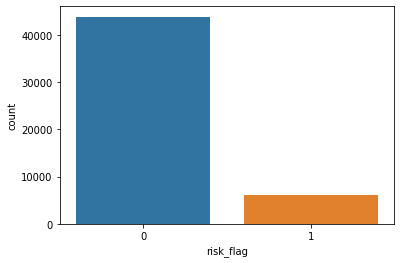

In [ ]:
print(label.value_counts()/len(train_data))
sns.countplot(x=label)
plt.show()

About 88% not risk flaged and 12% are risk flaged<br>
The Classes are imbalanced 

In [ ]:
# Encoding Categorical features
cat_cols=['married','house_ownership','car_ownership','profession','city','state']

for col in cat_cols:
    train_data[col] = train_data[col].apply(lambda x: hash(x))

In [ ]:
train_data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,2074419,37,1,4982823278491960959,3923573458535332077,-7123146691958228443,7584166438885860011,-8407167737159496213,-6562184379986711184,1,11
1,3728026,48,17,4982823278491960959,3923573458535332077,6993158458405298039,-1809231749147453373,3816868724549676001,7757121376097511647,11,12
2,7159687,38,5,4982823278491960959,3923573458535332077,-7123146691958228443,-3838418463941040132,-1328449136411306314,7757121376097511647,3,11
3,277326,45,9,4982823278491960959,3923573458535332077,-7123146691958228443,5958495263075722274,-6230267578328156660,1184996349864873707,9,13
4,8822191,26,13,4982823278491960959,3923573458535332077,-7123146691958228443,2866747513007042170,-1182875715359974610,8484189802291898024,3,10


In [ ]:
# determining the mutual information scores
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(train_data,label,discrete_features=True)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_data.columns
mutual_info.sort_values(ascending=False)

income                 0.274218
city                   0.013315
experience             0.001996
age                    0.001612
state                  0.001551
profession             0.001485
current_job_years      0.001298
car_ownership          0.000364
house_ownership        0.000317
married                0.000175
current_house_years    0.000055
dtype: float64

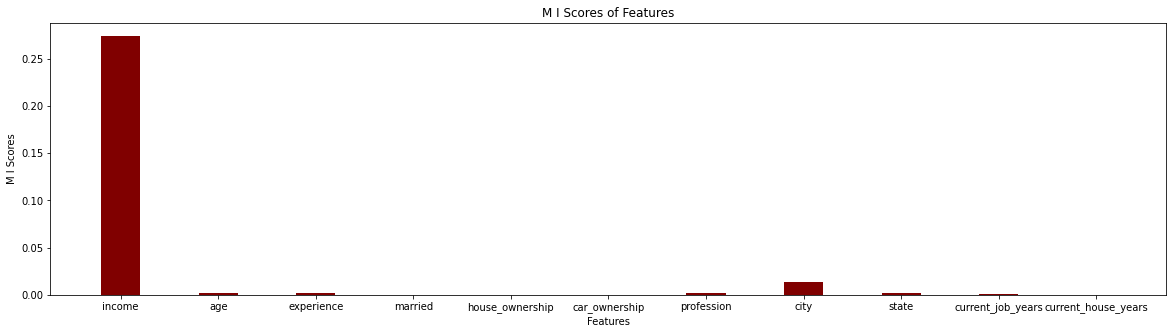

In [ ]:
fig = plt.figure(figsize = (20, 5))
 
plt.bar(train_data.columns, mutual_info , color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("M I Scores")
plt.title("M I Scores of Features")
plt.show()

Since ```current_house_years``` has very low MI score as well as low std deviation, we will drop this feature as it may not help in classification

In [ ]:
train_data=train_data.drop(['current_house_years'], axis=1)
features=train_data.columns

In [ ]:
features=train_data.columns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
train_data[features] = std.fit_transform(train_data[features])
#test_data[features] = std.fit_transform(test_data[features])

In [ ]:
# Spliting data for Training and Testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_data,label,test_size = 0.2,random_state=21)

In [ ]:
x_train.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years
4183,-0.098579,0.938672,-1.007392,-2.968437,0.189785,-0.656618,-0.328876,0.066886,0.983565,-0.632649
18443,1.712532,-1.229321,-1.007392,0.336878,0.189785,-0.656618,0.304005,-1.647065,-0.325178,-0.907074
26332,0.971227,-0.936349,1.160067,0.336878,0.189785,-0.656618,0.845937,0.897613,0.626461,0.465052
39816,-0.689015,-1.522293,0.159702,0.336878,-5.832152,-0.656618,-0.645018,-0.220074,0.961138,1.288327
21627,0.199488,-0.643377,0.826612,0.336878,0.189785,-0.656618,0.768660,0.786203,1.090859,0.190627


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_curve,auc,confusion_matrix,roc_auc_score
# Very unbalanced data therefore we balance the class weights
clf = RandomForestClassifier(n_estimators=150,n_jobs=-1,class_weight='balanced')
clf.fit(x_train, y_train)
y_score = clf.predict_proba(x_test)
roc_auc_score = roc_auc_score(y_test,y_score[:,1])
print(roc_auc_score)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))

0.9249199721936192
[[8101  655]
 [ 383  861]]
Precision: 0.9067240675292556, Recall: 0.8962


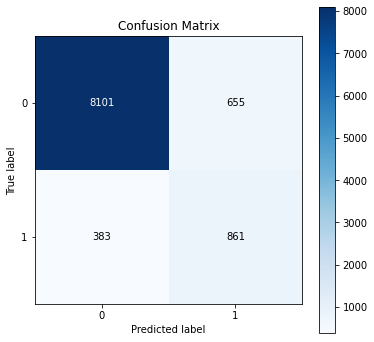

In [ ]:
! pip install -q scikit-plot
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(6,6))

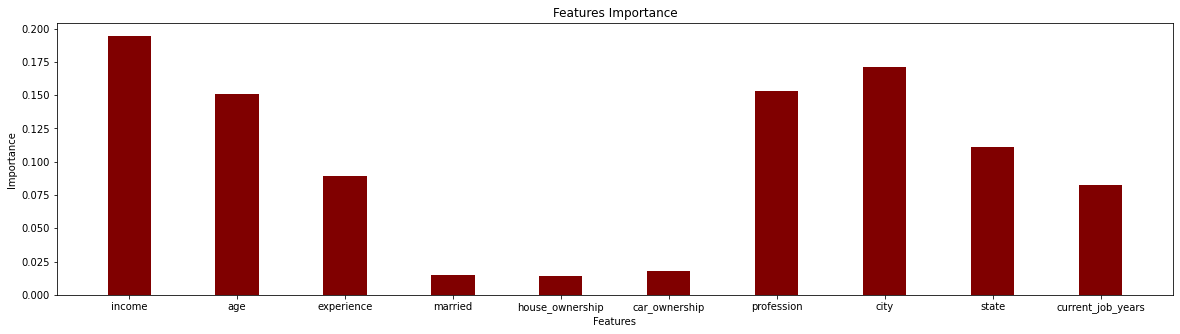

In [ ]:
feature_imp=clf.feature_importances_
fig = plt.figure(figsize = (20, 5))
 
plt.bar(train_data.columns,feature_imp , color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [ ]:
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)>

In [ ]:
test_data=df_test.drop(['Id','current_house_years'], axis=1)
for col in cat_cols:
    test_data[col] = test_data[col].apply(lambda x: hash(x))
test_data[features] = std.transform(test_data[features])

predictions = clf.predict(test_data)
print(predictions)
submission = pd.DataFrame({'Id':df_test['Id'],'risk_flag':predictions})
submission.head()

[0 0 0 ... 1 1 0]


,Id,risk_flag
0,144036,0
1,166701,0
2,238331,0
3,144552,0
4,203146,0


In [ ]:
submission.to_csv('file1.csv', index=False)